# Data Cleaning Challenge!

---
## Goals of this lesson

### Students will test their understanding of:

1. How to open data in Python
2. How to check for missing or problematic data and address issues.
3. How to filter, rearrange and shape data in preparation for analysis.
---
## Your turn!

Now it's your turn to try opening and cleaning a new data set. There are issues with the raw data, so make sure to inspect the variables and make changes when needed. Below is a rough outline to follow, try to get as far as you can.

NOTE: This is the key for the data challenge, so it has all the code already. If you haven't done the challenge, go to the blank version and try doing it on your own. If you are using this key to check your work, remember that there are many ways to do things in Python, so what you did might not be what we did here, but it can still be right (it might even be better!).

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_context("poster")
sns.set(style="ticks",font="Arial",font_scale=2)

## Open and visually inspect the data

Read the data into Python. The file is called "Study2_Subjects.csv". Check out the separate "README_Study2.txt" file for information on the study and variables.

In [10]:
os.getcwd()

'/Users/jonathan/Desktop/cu-psych-comp-tutorial/Python/dataCleaning'

In [11]:
os.listdir()

['CleaningChallenge_Code.pynb',
 '.DS_Store',
 'Study1_Followup.csv',
 'Study2_Subjects.csv',
 'Study1_clean.csv',
 'DataCleaning_code.ipynb',
 '.ipynb_checkpoints',
 'Study1.csv',
 'README_Study2.txt',
 'Study2_Trials.csv']

In [18]:
subjects = pd.read_table("Study2_Subjects.csv", sep=",")

View the first 5 rows of the data frame:

In [19]:
subjects.head()

,ID,Age,Sex,Q1,Q2,Q3,Condition
0,1,22,1,24.06,27.24,19.53,A
1,2,24,2,33.17,30.84,40.78,B
2,3,26,2,29.42,34.29,16.28,C
3,4,27,2,17.61,31.65,27.75,A
4,5,30,1,24.15,35.18,24.04,B


Examine the data for issues. Some things to look for: are the column names logical? Are there missing values? Do the variable types make sense? (ie does everything that's a factor make sense as a factor, and does everything that's numeric make sense as numeric?) Are there values that don't make sense? Fix any issues you find:

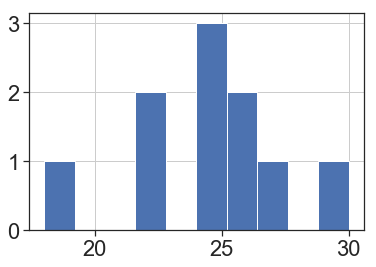

In [21]:
subjects["Age"].hist();

In [22]:
subjects["Sex"]

0    1
1    2
2    2
3    2
4    1
5    1
6    1
7    1
8    1
9    2
Name: Sex, dtype: int64

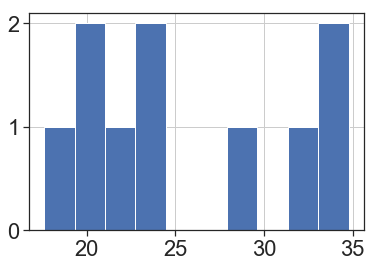

In [23]:
subjects["Q1"].hist();

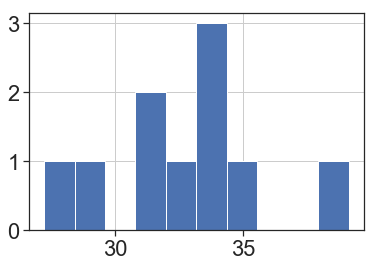

In [24]:
subjects["Q2"].hist();

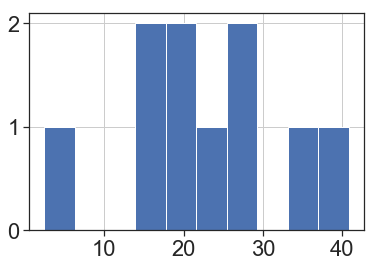

In [25]:
subjects["Q3"].hist();

In [26]:
subjects["Condition"]

0      A
1      B
2      C
3      A
4      B
5      C
6      A
7      B
8    NaN
9      A
Name: Condition, dtype: object

In [27]:
#check for missing values
subjects.isnull()

,ID,Age,Sex,Q1,Q2,Q3,Condition
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False


---
## Correcting data issues
Remember to check the README for additional information on the data that may help you decide what needs to be fixed.

The Condition variable has a missing data point for sub 9:

In [28]:
subjects.loc[subjects["ID"]==9, "Condition"] = "C"

The variables Q1, Q2 and Q3 don't have useful names, update them to something useful:

In [35]:
subjects = subjects.rename({'Q1':'Anxiety',
                            'Q2':'Depression',
                            'Q3':'Stress'}, axis="columns")

The sex variable is coded in a non-intuitive way, change it to male/female:

In [34]:
subjects["Sex"] = subjects["Sex"].replace({1:"Male",2:"Female"})

---
## Create new Variables

Each subject in this study filled out three related questionnaires, but these scores can be combined into a composite score but taking the sum. Create a new variable for this score:


In [42]:
subjects["Composite"] = subjects[["Anxiety","Depression","Stress"]].sum(axis="columns")

---
## Combine two datasets together and reshape

You see there's another .csv file for Study 2, this one's called Study2_Trials.csv. Open it and take a look. This frame has the same 10 subjects, but now it has reaction time data from a task with 30 trials. Create a new data frame that combines this with your subject level information:

In [51]:
trials = pd.read_table("Study2_Trials.csv", sep=",")
data = subjects.merge(trials,on="ID")
data.head()

,ID,Age,Sex,Anxiety,Depression,Stress,Condition,Composite,RT_1,RT_2,...,RT_21,RT_22,RT_23,RT_24,RT_25,RT_26,RT_27,RT_28,RT_29,RT_30
0,1,22,Male,24.06,27.24,19.53,A,70.83,1.933,4.141,...,3.445,3.081,4.122,2.766,1.100,3.826,1.505,3.395,2.035,3.184
1,2,24,Female,33.17,30.84,40.78,B,104.79,4.586,4.598,...,3.716,4.691,4.979,2.358,3.157,4.603,4.306,5.390,3.486,5.483
2,3,26,Female,29.42,34.29,16.28,C,79.99,3.067,1.851,...,3.225,2.962,3.038,5.075,3.778,3.761,2.338,3.614,3.569,3.048
3,4,27,Female,17.61,31.65,27.75,A,77.01,3.871,2.929,...,3.458,3.118,2.827,3.971,1.195,2.963,1.653,2.516,1.871,5.568
4,5,30,Male,24.15,35.18,24.04,B,83.37,4.781,5.699,...,5.121,4.901,2.644,2.731,4.313,4.918,6.338,2.183,5.746,4.041


Now that you have a one frame with all the data, put it into long format. Each subject should have one row for each trial.

In [59]:
id_cols, value_cols = [], []
for column in data.columns:
    if 'RT' in column:
        value_cols.append(column)
    else:
        id_cols.append(column)
    
data_long = pd.melt(data,id_vars=id_cols,var_name="Trial",value_vars=value_cols,value_name="RT")
data_long.head()

,ID,Age,Sex,Anxiety,Depression,Stress,Condition,Composite,Trial,RT
0,1,22,Male,24.06,27.24,19.53,A,70.83,RT_1,1.933
1,2,24,Female,33.17,30.84,40.78,B,104.79,RT_1,4.586
2,3,26,Female,29.42,34.29,16.28,C,79.99,RT_1,3.067
3,4,27,Female,17.61,31.65,27.75,A,77.01,RT_1,3.871
4,5,30,Male,24.15,35.18,24.04,B,83.37,RT_1,4.781


You want to do a separate analysis only on the people who had a high score on the anxiety questionnaire. Create a new data frame (in long format) with just the individuals who got 25 or higher:

In [61]:
subset = data_long[data_long["Anxiety"] >= 25]